In [1]:
##import dataset
import pandas as pd
import numpy as np 
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("../dat/cleaned_data/hot_tweets_merged_dataset.csv")

In [5]:
import nest_asyncio
nest_asyncio.apply()
__import__('IPython').embed()

Python 3.8.3 (default, May 19 2020, 13:54:14) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.18.1 -- An enhanced Interactive Python. Type '?' for help.



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/jochenluithardt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 729, in _input_request
    ident, reply = self.session.recv(self.stdin_socket, 0)
  File "/Users/jochenluithardt/miniconda3/lib/python3.8/site-packages/jupyter_client/session.py", line 807, in recv
    msg_list = socket.recv_multipart(mode, copy=copy)
  File "/Users/jochenluithardt/miniconda3/lib/python3.8/site-packages/zmq/sugar/socket.py", line 475, in recv_multipart
    parts = [self.recv(flags, copy=copy, track=track)]
  File "zmq/backend/cython/socket.pyx", line 791, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 827, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 186, in zmq.backend.cython.socket._recv_copy
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt

During handling of the above exception, another exceptio

TypeError: object of type 'NoneType' has no len()

In [10]:
test_n = int(len(data) * 0.2)

# split dataset
X = np.asarray(data["High"])
train, test = X[1:len(X)-test_n], X[len(X)-test_n:]

# train autoregression
window = 1
model = AutoReg(train, lags=window)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot
plt.figure(figsize=(20, 10))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 0.032
<Figure size 1440x720 with 1 Axes>


/Users/jochenluithardt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [4]:
# line search for the right lag parameter
lags = 100
res = np.zeros((lags,2))
# train autoregression
for i in range(len(res)):
    
    window = i
    model = AutoReg(train, lags=window)
    model_fit = model.fit()
    coef = model_fit.params
    # walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    
    res[i,0] = i 
    res[i,1] = rmse

ind = res[:,1].argmin()
print(res[ind])

/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Se

Test RMSE: 0.279
Test RMSE: 0.032
Test RMSE: 0.032
Test RMSE: 0.033
Test RMSE: 0.033
Test RMSE: 0.034
Test RMSE: 0.034
Test RMSE: 0.034
Test RMSE: 0.034
Test RMSE: 0.034
Test RMSE: 0.034
Test RMSE: 0.034
Test RMSE: 0.035
Test RMSE: 0.035
Test RMSE: 0.035
Test RMSE: 0.035
Test RMSE: 0.035
Test RMSE: 0.035
Test RMSE: 0.035
Test RMSE: 0.036
Test RMSE: 0.036
Test RMSE: 0.037
Test RMSE: 0.037
Test RMSE: 0.037


/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Se

Test RMSE: 0.038
Test RMSE: 0.038
Test RMSE: 0.038
Test RMSE: 0.038
Test RMSE: 0.038
Test RMSE: 0.038
Test RMSE: 0.038
Test RMSE: 0.038
Test RMSE: 0.039
Test RMSE: 0.039
Test RMSE: 0.039
Test RMSE: 0.040
Test RMSE: 0.040
Test RMSE: 0.041
Test RMSE: 0.042


/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Se

Test RMSE: 0.042
Test RMSE: 0.044
Test RMSE: 0.043
Test RMSE: 0.042
Test RMSE: 0.044
Test RMSE: 0.045
Test RMSE: 0.045
Test RMSE: 0.044
Test RMSE: 0.049
Test RMSE: 0.049
Test RMSE: 0.050
Test RMSE: 0.050
Test RMSE: 0.050
Test RMSE: 0.049


/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Se

Test RMSE: 0.049
Test RMSE: 0.050
Test RMSE: 0.051
Test RMSE: 0.054
Test RMSE: 0.054
Test RMSE: 0.056
Test RMSE: 0.057
Test RMSE: 0.058
Test RMSE: 0.058


/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Se

Test RMSE: 0.058
Test RMSE: 0.058
Test RMSE: 0.063
Test RMSE: 0.063
Test RMSE: 0.063
Test RMSE: 0.063
Test RMSE: 0.064
Test RMSE: 0.064
Test RMSE: 0.064
Test RMSE: 0.064


/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Se

Test RMSE: 0.065
Test RMSE: 0.066
Test RMSE: 0.066
Test RMSE: 0.066
Test RMSE: 0.067
Test RMSE: 0.068
Test RMSE: 0.068


/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Se

Test RMSE: 0.068
Test RMSE: 0.069
Test RMSE: 0.069
Test RMSE: 0.069
Test RMSE: 0.070
Test RMSE: 0.073
Test RMSE: 0.074
Test RMSE: 0.074
Test RMSE: 0.077
Test RMSE: 0.077
Test RMSE: 0.078
Test RMSE: 0.079
Test RMSE: 0.079
Test RMSE: 0.080
Test RMSE: 0.080


/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Se

Test RMSE: 0.084
Test RMSE: 0.087
Test RMSE: 0.087
Test RMSE: 0.088
Test RMSE: 0.090
Test RMSE: 0.090
[1.         0.03195936]


/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/jonas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Se

In [13]:
## test if time after tweets is significantly different from random time intervals
# get hot tweet dates
import pandas as pd
import os
from datetime import datetime
import numpy as np

string = "../dat/musk_tweets/"
df_tweets = pd.read_csv(string+os.listdir(string)[0])
for f in os.listdir(string)[1:]:
    df_tweet = pd.read_csv(string+f)
    df_tweets = df_tweets.append(df_tweet)
    
df_tweets = df_tweets.drop("Unnamed: 0", axis = 1)

index = df_tweets.tweet.str.contains("dogecoin", case=False)
df_tweets[index].tweet

date_changer = lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S")
new_date =  np.array([date_changer(xi) for xi in df_tweets["date"]])

df_tweets["date"] = new_date
df_tweets["date"] = df_tweets["date"].dt.date
df_tweets["date"] = df_tweets["date"].astype("string")
df_tweets["Date"] = df_tweets["date"]

##filter for dogecoin tweets
index = df_tweets.tweet.str.contains("dogecoin", case=False)
df_tweets = df_tweets[index]

hot_tweets = df_tweets.date 
hot_tweets = pd.to_datetime(hot_tweets)

#convert data date column to datetime
data["Date"] = pd.to_datetime(data["Date"])

In [14]:
## delete duplicated dates 
data = data.drop_duplicates(subset=["Date"], keep='first')
data["Date"] = pd.to_datetime(data["Date"])
data.head()

<ipython-input-14-61f36cfa1a68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"])


,Unnamed: 0,tweet,hashtags,cashtags,day,hour,link,urls,retweet,nlikes,...,nretweets,quote_url,reply_to,retweet_date,Date,Open,High,Low,Close,Volume
0,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550
1,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520
2,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080
3,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960
4,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270


In [46]:
import random as ran
from scipy import stats

num_days = 40
## get unique tweets, fit model next x dates and store slopes
tweets = hot_tweets.unique()

parameters_date_after = np.ones((len(tweets), 2))
parameters_date_before = np.ones((len(tweets), 2))
for i in range(len(tweets)):
    # create dataset
    ind = np.where(data["Date"] == tweets[i])[0][0]
    dat = data[ind:ind+num_days]
    dat = np.array(dat["High"])
    
    # train autoregression
    window = 1
    model = AutoReg(dat,lags=window)
    model_fit = model.fit()
    coef = model_fit.params
    parameters_date_after[i,0] = coef[0]
    parameters_date_after[i,1] = coef[1]

    ## do the same for 40 days before tweet

    # create dataset
    dat_2 = data[(ind-num_days-1):(ind-1)]
    dat_2 = np.array(dat_2["High"])
    # train autoregression
    window = 1
    model_2 = AutoReg(dat_2,lags=window)
    model_2_fit = model_2.fit()
    coef_2 = model_2_fit.params
    parameters_date_before[i,0] = coef_2[0]
    parameters_date_before[i,1] = coef_2[1]

## test if differences are significant
stats.ttest_rel(parameters_date_before[:,1], parameters_date_after[:,1])

Ttest_relResult(statistic=2.1042825361415702, pvalue=0.06847978283141898)

In [ ]:
# 1. Tweet: Dogecoin rulz https://t.co/flWWUgAgLU
# - Before: -0.38246442
# - After:  0.30901568
#   Positiv | Increase [ok]

# 2. Tweet: @28delayslater @justpaulinelol Dogecoin Mode
# - Before: 0.28052203
# - After: 0.1041589
#   Positive | Decrease [error]

# 3. Tweet: Dogecoin is the people’s crypto
# - Before: 0.45913537
# - After: 0.53518471
#   Positive | Increase [ok]

# 4. Tweet: @Jbuttermost @Dogecoinrich 🤣🤣
# - Before: 0.28850952
# - After: 1.48043151
#   Positive | Increase [ok]


# 5. Tweet: Bought some Dogecoin for lil X, so he can be a toddler hodler
# - Before: 0.63442483
# - After: -0.42006519
#   Positive | Decrease [error]


# 6. Tweet: If major Dogecoin holders sell most of their coins, it will get my full support. Too much concentration is the only real issue imo.
# - Before: -0.03271873
# - After: 0.19503416
#   Negative | Increase [error]


# 7. Tweet: @PPathole @dogecoin Just some used Antminer L3+ rigs bought off eBay. Not really economic, but it was a fun family project.',
#.          @draecomino 2022: Dogecoin is dumb
# - Before: 0.34742819
# - After: 0.98214038
#   Positive | Increase [ok]

# 8. Tweet: Origin of Doge Day Afternoon: The ancient Romans sacrificed a Dogecoin at the beginning of the Doge Days to appease the rage of Sirius, believing that the star was the cause of the hot, sultry weather.
# - Before: 0.09753524
# - After: 0.66645888
#   Netrual | Increase [?]



In [36]:
parameters_date_before[:,1]

array([-0.38246442,  0.28052203,  0.45913537,  0.28850952,  0.63442483,
       -0.03271873,  0.81649449,  0.34742819,  0.09753524])

In [37]:
parameters_date_after[:,1]

array([ 0.30901568,  0.1041589 ,  0.53518471,  1.48043151, -0.42006519,
        0.19503416,  0.87460402,  0.98214038,  0.66645888])

In [32]:
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

#### Power analysis of t_test

## Monte Carlo Simulation of t-statistic distribution
# test for normailty of both paramerter distributions
print(scipy.stats.shapiro(parameters_date_before[:,1])) #normal
print(scipy.stats.shapiro(parameters_date_after[:,1])) #normal 
mean_before = np.mean(parameters_date_before[:,1])
std_before = np.std(parameters_date_before[:,1])/np.sqrt(9) # std error
mean_after = np.mean(parameters_date_after[:,1])
std_after = np.std(parameters_date_after[:,1])/np.sqrt(9) # std error

## sample from the two underlying distributions n times and perform same test. 
# Number of sig. results gives power
n_sim = 2000
res = np.ones((n_sim, 2))
num_samples = 9
for i in range(n_sim):   
    data_before = np.random.normal(mean_before, std_before, num_samples)
    data_after =  np.random.normal(mean_after, std_after, num_samples)
    t_test = stats.ttest_rel(data_before, data_after)
    res[i,0] = t_test[0]
    res[i,1] = t_test[1]
print(f"{np.mean(res[:,1] < 0.05)} % significant results")
print(f"required sample size would be {num_samples} tweets to achieve a power of over 0.8")

##plot normal distributions

plt.figure(figsize=(10, 7))
# before
x_min = np.min(-0.25)
x_max = np.max(1.25)
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x,mean_before,std_before)
plt.plot(x,y, color='coral', label = "before_tweet")
plt.axvline(x = mean_before, c = "red",linestyle='dashed')
#after
x_min = np.min(mean_after-1)
x_max = np.max(mean_after+1)
y_1 = scipy.stats.norm.pdf(x,mean_after,std_after)
plt.plot(x,y_1, color='blue', label = "after_tweet")
plt.axvline(x = mean_after, c = "red",linestyle='dashed')

# other plotting parameters
plt.grid()
plt.title('Probability Density Functions of Regression Parameters before and after Tweets',fontsize=13)
plt.xlabel('Parameter Values',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.legend()
plt.show


## plot results of simulations
plt.figure(figsize=(10, 7))
plt.grid()
sns.histplot(res[:,0], kde=True, bins=50)
plt.axvline(np.median(res[:,0]), c = "red", linestyle = "dashed", label = "Median")
plt.axvline(-1.1542059458495475, c = "green", linestyle = "dashed", label = "Value found in the Data")
plt.xlabel(f"t-statistics, Median: {np.median(res[:,0])}, SD: {np.std(res[:,0])}",fontsize=13)
plt.title("Monte Carlo Power Analysis Simulations t-Statistics")
plt.ylabel("Frequency",fontsize=13)
plt.legend()
plt.show()


ShapiroResult(statistic=0.9806000590324402, pvalue=0.9672896862030029)
ShapiroResult(statistic=0.9926299452781677, pvalue=0.9986863732337952)
0.8655 % significant results
required sample size would be 9 tweets to achieve a power of over 0.8
<Figure size 720x504 with 1 Axes>
<Figure size 720x504 with 1 Axes>


In [9]:
## paired sample t tests for data instead of slopes
test_statistic = np.ones((9, 2))
num_days = 7
p = 0.05/9 # bonferroni correction
## get unique tweets, fit model next x dates and store slopes
tweets = hot_tweets.unique()

## get data for t_test
for i in range(len(tweets)):
    # create dataset after
    ind = np.where(data["Date"] == tweets[i])[0][0]
    dat = data[ind:ind+num_days]
    dat = np.array(dat["High"])
    
    # create dataset before
    dat_2 = data[(ind-num_days-1):(ind-1)]
    dat_2 = np.array(dat_2["High"])
    ## test if differences are significant
    t_test = stats.ttest_rel(dat, dat_2)
    print(stats.ttest_rel(dat, dat_2))
    ## save values    
    test_statistic[i,0] = t_test[0]
    test_statistic[i,1] = t_test[1]
    
    print(f"{np.mean(test_statistic[:,1] < p)} % significant results")



Ttest_relResult(statistic=6.1474561542675525, pvalue=0.0008488444832233301)
0.1111111111111111 % significant results
Ttest_relResult(statistic=10.432175006097875, pvalue=4.5481348788473405e-05)
0.2222222222222222 % significant results
Ttest_relResult(statistic=1.6107671815126907, pvalue=0.15835640687356617)
0.2222222222222222 % significant results
Ttest_relResult(statistic=-0.7133713504427758, pvalue=0.5024063968877477)
0.2222222222222222 % significant results
Ttest_relResult(statistic=-2.9179931840151325, pvalue=0.026700972554755755)
0.2222222222222222 % significant results
Ttest_relResult(statistic=-3.5365634697607033, pvalue=0.012269819506222274)
0.2222222222222222 % significant results
Ttest_relResult(statistic=1.0925047719119716, pvalue=0.31652447911961146)
0.2222222222222222 % significant results
Ttest_relResult(statistic=7.31893430834852, pvalue=0.00033221532591868713)
0.3333333333333333 % significant results
Ttest_relResult(statistic=3.313380048831763, pvalue=0.0161367051085925

In [15]:
## different approach aggregate seven days before and after of all tweets to two distributions (arrays)
import random as ran
from scipy import stats
data_before = []
data_after = []
num_days = 7
## get unique tweets, fit model next x dates and store slopes
tweets = hot_tweets.unique()

for i in range(len(tweets)):
    # create dataset
    ind = np.where(data["Date"] == tweets[i])[0][0]
    dat = data[ind:ind+num_days]
    dat = np.array(dat["High"])
    data_after.append(dat)

    ## do the same for n days before tweet

    # create dataset
    dat_2 = data[(ind-num_days-1):(ind-1)]
    dat_2 = np.array(dat_2["High"])
    data_before.append(dat_2)

data_before = np.array([item for sublist in data_before for item in sublist])
data_after = np.array([item for sublist in data_after for item in sublist])
## test if differences are significant
stats.ttest_rel(data_before, data_after)

Ttest_relResult(statistic=-2.4033152018986264, pvalue=0.019252003123732278)

NormaltestResult(statistic=7.974560946813594, pvalue=0.018550093056714574)
NormaltestResult(statistic=8.924809018760497, pvalue=0.01153459487456959)
1.0 % significant results
With sample size: 63 power is 100%


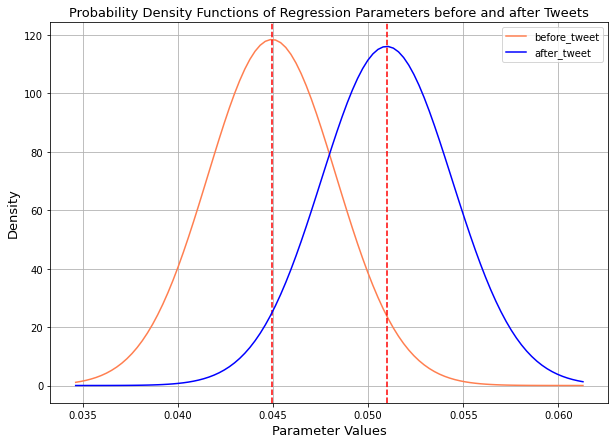

In [11]:
#### Power analysis of t_test
## Monte Carlo Simulation of t-statistic distribution
# test for normailty of both paramerter distributions
print(scipy.stats.normaltest(data_before)) #not-gaussian!!!
print(scipy.stats.normaltest(data_after)) #not-gaussian!!! 
mean_before = np.mean(data_before)
std_before = np.std(data_before)/np.sqrt(len(data_before)) # std error
mean_after = np.mean(data_after)
std_after = np.std(data_after)/np.sqrt(len(data_after)) # std error

## sample from the two underlying distributions n times and perform same test. 
# Number of sig. results gives power
n_sim = 2000
res = np.ones((n_sim, 2))
num_samples = len(data_before)
for i in range(n_sim):   
    data_before = np.random.normal(mean_before, std_before, num_samples)
    data_after =  np.random.normal(mean_after, std_after, num_samples)
    t_test = stats.ttest_rel(data_before, data_after)
    res[i,0] = t_test[0]
    res[i,1] = t_test[1]

print(f"{np.mean(res[:,1] < 0.05)} % significant results")
print(f"With sample size: {num_samples} power is 100%")

##plot normal distributions

plt.figure(figsize=(10, 7))
# before
x_min = mean_before-(3*std_after)
x_max = mean_after+(3*std_after)
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x,mean_before,std_before)
plt.plot(x,y, color='coral', label = "before_tweet")
plt.axvline(x = mean_before, c = "red",linestyle='dashed')
#after
y_1 = scipy.stats.norm.pdf(x,mean_after,std_after)
plt.plot(x,y_1, color='blue', label = "after_tweet")
plt.axvline(x = mean_after, c = "red",linestyle='dashed')

# other plotting parameters
plt.grid()
plt.title('Probability Density Functions of Regression Parameters before and after Tweets',fontsize=13)
plt.xlabel('Parameter Values',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.legend()
plt.show()


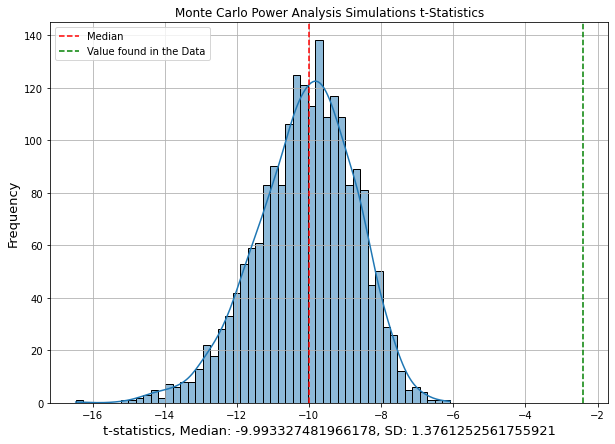

In [13]:
## plot results of simulations
plt.figure(figsize=(10, 7))
plt.grid()
sns.histplot(res[:,0], kde=True, bins=50)
plt.axvline(np.median(res[:,0]), c = "red", linestyle = "dashed", label = "Median")
plt.axvline(-2.4033152018986264, c = "green", linestyle = "dashed", label = "Value found in the Data")
plt.xlabel(f"t-statistics, Median: {np.median(res[:,0])}, SD: {np.std(res[:,0])}",fontsize=13)
plt.title("Monte Carlo Power Analysis Simulations t-Statistics")
plt.ylabel("Frequency",fontsize=13)
plt.legend()
plt.show()
